# Correlation Notebook

This notebook is used to explore correlations between data points in the CAMPCOMP dataset and the PEIMS dataset for 4-year longitudinal data.

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import math

In [5]:
year = 2020
filename = f'CAMPCOMP_{year}_CLEAN.csv'

In [6]:
df = pd.read_csv(filename, index_col='Campus Number', dtype={'Campus Number': str})

In [7]:
df = df.dropna(how='all')

In [8]:
df

,District Number,2020 [Graduates + TxCHSE Recipients + Continuers] for All Students Numerator,2020 [Graduates + TxCHSE Recipients + Continuers] for African American Numerator,2020 [Graduates + TxCHSE Recipients + Continuers] for American Indian Numerator,2020 [Graduates + TxCHSE Recipients + Continuers] for Asian Numerator,2020 [Graduates + TxCHSE Recipients + Continuers] for Hispanic Numerator,2020 [Graduates + TxCHSE Recipients + Continuers] for Pacific Islander Numerator,2020 [Graduates + TxCHSE Recipients + Continuers] for White Numerator,2020 [Graduates + TxCHSE Recipients + Continuers] for Two or More Races Numerator,2020 [Graduates + TxCHSE Recipients + Continuers] for Special Ed Numerator,...,2019 [Graduates] for White Rate (Federal Graduation without Exclusions),2019 [Graduates] for Two or More Races Rate (Federal Graduation without Exclusions),2019 [Graduates] for Special Ed Rate (Federal Graduation without Exclusions),2019 [Graduates] for At Risk Rate (Federal Graduation without Exclusions),2019 [Graduates] for Econ Disadv Rate (Federal Graduation without Exclusions),2019 [Graduates] for Female Rate (Federal Graduation without Exclusions),2019 [Graduates] for Male Rate (Federal Graduation without Exclusions),2019 [Graduates] for EL Rate (Federal Graduation without Exclusions),Campus Name,District Name
Campus Number,,,,,,,,,,,,,,,,,,,,,
1902001,1902,39.0,NaN,NaN,NaN,NaN,NaN,33.0,NaN,9.0,...,97.7,NaN,88.9,100.0,90.5,100.0,93.5,NaN,CAYUGA H S,CAYUGA ISD
1902041,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAYUGA MIDDLE,CAYUGA ISD
1902103,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAYUGA EL,CAYUGA ISD
1903001,1903,89.0,6.0,NaN,NaN,10.0,NaN,67.0,NaN,14.0,...,92.1,NaN,72.7,78.3,93.0,100.0,87.5,NaN,ELKHART H S,ELKHART ISD
1903041,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELKHART MIDDLE,ELKHART ISD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254901101,254901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DR TOMAS RIVERA EL,CRYSTAL CITY ISD
254901104,254901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENITO JUAREZ MIDDLE,CRYSTAL CITY ISD
254901106,254901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZAVALA EL,CRYSTAL CITY ISD


## Correlation Between Student Race and Percentage of Economically Disadvantaged students

This is to see if there is a correlation between the percentage of economically disadvantaged students and the number of graduates from each race.

In [9]:
demographics = [
    "African American",
    "All Students",
    "American Indian",
    "Asian",
    "Hispanic",
    "Pacific Islander",
    "Two or More Races",
    "White",
    "Female",
    "Male",
    "EL",
    "Special Ed"
]

In [10]:
graduate_cols = [
    f'{year} [Graduates] for {demo} Rate' for demo in demographics
] 
dropout_cols = [
    f'{year} [Dropout] for {demo} Rate' for demo in demographics
]

all_cols_graduate = graduate_cols + dropout_cols + [
    f'{year} Econ Disadv Denominator',
    f'{year} All Students Denominator'
]

all_cols_graduate

['2020 [Graduates] for African American Rate',
 '2020 [Graduates] for All Students Rate',
 '2020 [Graduates] for American Indian Rate',
 '2020 [Graduates] for Asian Rate',
 '2020 [Graduates] for Hispanic Rate',
 '2020 [Graduates] for Pacific Islander Rate',
 '2020 [Graduates] for Two or More Races Rate',
 '2020 [Graduates] for White Rate',
 '2020 [Graduates] for Female Rate',
 '2020 [Graduates] for Male Rate',
 '2020 [Graduates] for EL Rate',
 '2020 [Graduates] for Special Ed Rate',
 '2020 [Dropout] for African American Rate',
 '2020 [Dropout] for All Students Rate',
 '2020 [Dropout] for American Indian Rate',
 '2020 [Dropout] for Asian Rate',
 '2020 [Dropout] for Hispanic Rate',
 '2020 [Dropout] for Pacific Islander Rate',
 '2020 [Dropout] for Two or More Races Rate',
 '2020 [Dropout] for White Rate',
 '2020 [Dropout] for Female Rate',
 '2020 [Dropout] for Male Rate',
 '2020 [Dropout] for EL Rate',
 '2020 [Dropout] for Special Ed Rate',
 '2020 Econ Disadv Denominator',
 '2020 All Stud

In [11]:
graduates_df = df[all_cols_graduate].copy()

graduates_df['Econ Disadv Percent'] = graduates_df[f'{year} Econ Disadv Denominator'] / graduates_df[f'{year} All Students Denominator']

graduates_df[graduates_df['2020 [Dropout] for Pacific Islander Rate'].notna()]

,2020 [Graduates] for African American Rate,2020 [Graduates] for All Students Rate,2020 [Graduates] for American Indian Rate,2020 [Graduates] for Asian Rate,2020 [Graduates] for Hispanic Rate,2020 [Graduates] for Pacific Islander Rate,2020 [Graduates] for Two or More Races Rate,2020 [Graduates] for White Rate,2020 [Graduates] for Female Rate,2020 [Graduates] for Male Rate,...,2020 [Dropout] for Pacific Islander Rate,2020 [Dropout] for Two or More Races Rate,2020 [Dropout] for White Rate,2020 [Dropout] for Female Rate,2020 [Dropout] for Male Rate,2020 [Dropout] for EL Rate,2020 [Dropout] for Special Ed Rate,2020 Econ Disadv Denominator,2020 All Students Denominator,Econ Disadv Percent
Campus Number,,,,,,,,,,,,,,,,,,,,,
14906001,92.1,92.6,NaN,100.0,92.1,100.0,90.3,93.0,96.3,88.9,...,0.0,6.5,3.5,3.2,7.1,6.3,6.5,269.0,443.0,0.607223
14906002,94.7,95.1,NaN,94.1,96.9,100.0,84.8,96.4,96.5,93.9,...,0.0,9.1,2.7,2.5,3.4,3.2,7.8,245.0,577.0,0.424610
14906006,72.7,72.2,NaN,85.7,69.8,83.3,71.4,73.1,75.9,68.3,...,0.0,9.5,15.4,10.3,7.9,5.3,12.5,183.0,284.0,0.644366
14906007,96.2,95.0,NaN,96.8,93.5,90.9,100.0,94.2,96.7,93.2,...,9.1,0.0,4.1,2.3,5.0,15.0,1.6,179.0,583.0,0.307033
14906008,89.4,89.6,40.0,100.0,90.4,86.7,100.0,88.7,92.4,87.0,...,6.7,0.0,9.4,4.5,7.8,7.1,7.5,246.0,453.0,0.543046
15915006,100.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,40.0,184.0,0.217391
43901001,97.9,98.4,90.0,99.6,97.3,100.0,98.8,98.5,99.0,97.8,...,0.0,0.0,0.8,0.1,1.2,0.0,3.3,267.0,1622.0,0.164612
50910001,97.0,96.6,100.0,91.7,96.0,93.3,97.3,97.0,97.9,95.4,...,6.7,0.0,2.5,2.1,3.1,8.3,2.3,217.0,498.0,0.435743
71902012,80.6,91.4,NaN,100.0,91.5,100.0,85.7,96.4,93.8,89.3,...,0.0,7.1,1.8,2.9,5.8,11.1,5.4,290.0,453.0,0.640177


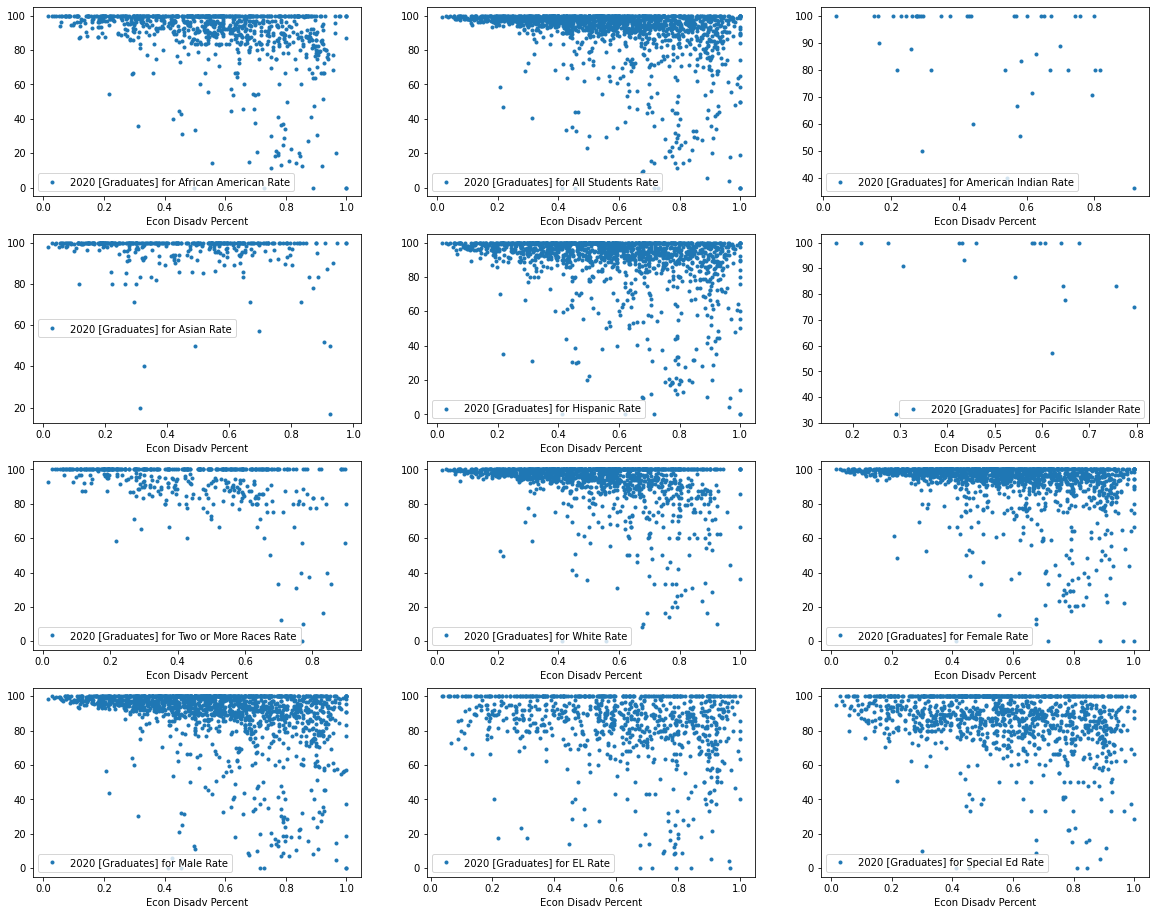

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3)

fig.set_figheight(16)
fig.set_figwidth(20)

for idx, target_col in enumerate(graduate_cols):
    graduates_df.plot(
        x='Econ Disadv Percent',
        y=target_col,
        style='.',
        ax=axes[math.floor(idx / 3), idx % 3]
    )

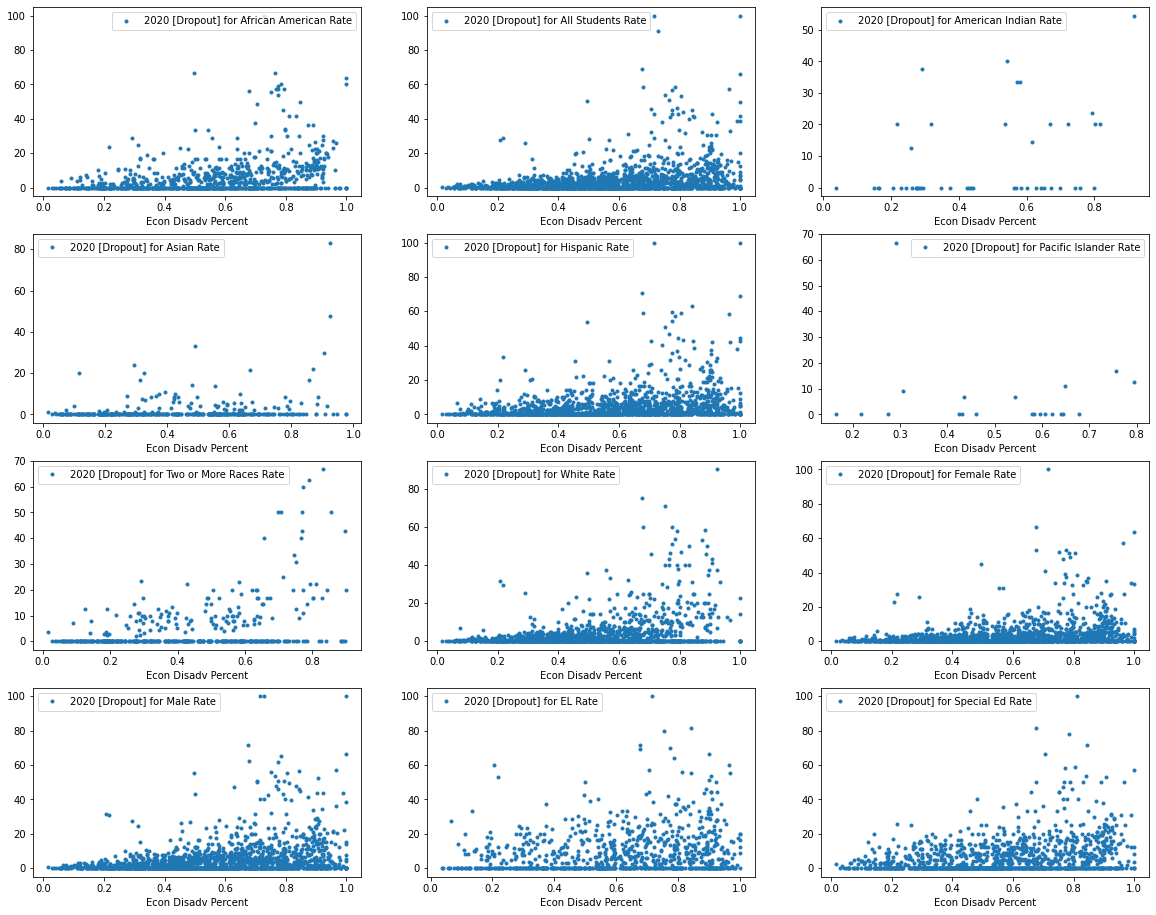

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=3)

fig.set_figheight(16)
fig.set_figwidth(20)

for idx, target_col in enumerate(dropout_cols):
    graduates_df.plot(
        x='Econ Disadv Percent',
        y=target_col,
        style='.',
        ax=axes[math.floor(idx / 3), idx % 3]
    )

In [14]:
corr_df = graduates_df.corr(min_periods=3, method='pearson')
corr_df[all_cols_graduate].loc['Econ Disadv Percent']

2020 [Graduates] for African American Rate    -0.329217
2020 [Graduates] for All Students Rate        -0.306858
2020 [Graduates] for American Indian Rate     -0.343213
2020 [Graduates] for Asian Rate               -0.177192
2020 [Graduates] for Hispanic Rate            -0.283086
2020 [Graduates] for Pacific Islander Rate    -0.079842
2020 [Graduates] for Two or More Races Rate   -0.380923
2020 [Graduates] for White Rate               -0.341049
2020 [Graduates] for Female Rate              -0.278147
2020 [Graduates] for Male Rate                -0.311577
2020 [Graduates] for EL Rate                  -0.248077
2020 [Graduates] for Special Ed Rate          -0.267204
2020 [Dropout] for African American Rate       0.325067
2020 [Dropout] for All Students Rate           0.298059
2020 [Dropout] for American Indian Rate        0.353537
2020 [Dropout] for Asian Rate                  0.204965
2020 [Dropout] for Hispanic Rate               0.272464
2020 [Dropout] for Pacific Islander Rate      -0

## Correlation between Racial Diversity and Number of Graduates

This calculates the percentage of any race for each school and determines the number of graduates from that school to test for a correlation.

In [15]:
diversity_cols = [f'{year} {demo} Denominator' for demo in demographics]

In [16]:
dropout_cols = [f'{year} [Dropout] for {demo} Rate' for demo in demographics]

In [17]:
all_cols_diversity = diversity_cols + graduate_cols + dropout_cols
all_cols_diversity

['2020 African American Denominator',
 '2020 All Students Denominator',
 '2020 American Indian Denominator',
 '2020 Asian Denominator',
 '2020 Hispanic Denominator',
 '2020 Pacific Islander Denominator',
 '2020 Two or More Races Denominator',
 '2020 White Denominator',
 '2020 Female Denominator',
 '2020 Male Denominator',
 '2020 EL Denominator',
 '2020 Special Ed Denominator',
 '2020 [Graduates] for African American Rate',
 '2020 [Graduates] for All Students Rate',
 '2020 [Graduates] for American Indian Rate',
 '2020 [Graduates] for Asian Rate',
 '2020 [Graduates] for Hispanic Rate',
 '2020 [Graduates] for Pacific Islander Rate',
 '2020 [Graduates] for Two or More Races Rate',
 '2020 [Graduates] for White Rate',
 '2020 [Graduates] for Female Rate',
 '2020 [Graduates] for Male Rate',
 '2020 [Graduates] for EL Rate',
 '2020 [Graduates] for Special Ed Rate',
 '2020 [Dropout] for African American Rate',
 '2020 [Dropout] for All Students Rate',
 '2020 [Dropout] for American Indian Rate',
 '

In [18]:
diversity_df = df[all_cols_diversity].copy()

for demo in demographics:
    diversity_df[f'{year} {demo} Pop Percent'] = diversity_df[f'{year} {demo} Denominator'] / diversity_df[f'{year} All Students Denominator']

diversity_df

,2020 African American Denominator,2020 All Students Denominator,2020 American Indian Denominator,2020 Asian Denominator,2020 Hispanic Denominator,2020 Pacific Islander Denominator,2020 Two or More Races Denominator,2020 White Denominator,2020 Female Denominator,2020 Male Denominator,...,2020 American Indian Pop Percent,2020 Asian Pop Percent,2020 Hispanic Pop Percent,2020 Pacific Islander Pop Percent,2020 Two or More Races Pop Percent,2020 White Pop Percent,2020 Female Pop Percent,2020 Male Pop Percent,2020 EL Pop Percent,2020 Special Ed Pop Percent
Campus Number,,,,,,,,,,,,,,,,,,,,,
1902001,NaN,39.0,NaN,NaN,NaN,NaN,NaN,33.0,21.0,18.0,...,NaN,NaN,NaN,NaN,NaN,0.846154,0.538462,0.461538,NaN,0.230769
1902041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903001,6.0,89.0,NaN,NaN,10.0,NaN,NaN,67.0,50.0,39.0,...,NaN,NaN,0.11236,NaN,NaN,0.752809,0.561798,0.438202,NaN,0.157303
1903041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254901101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254901104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254901106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


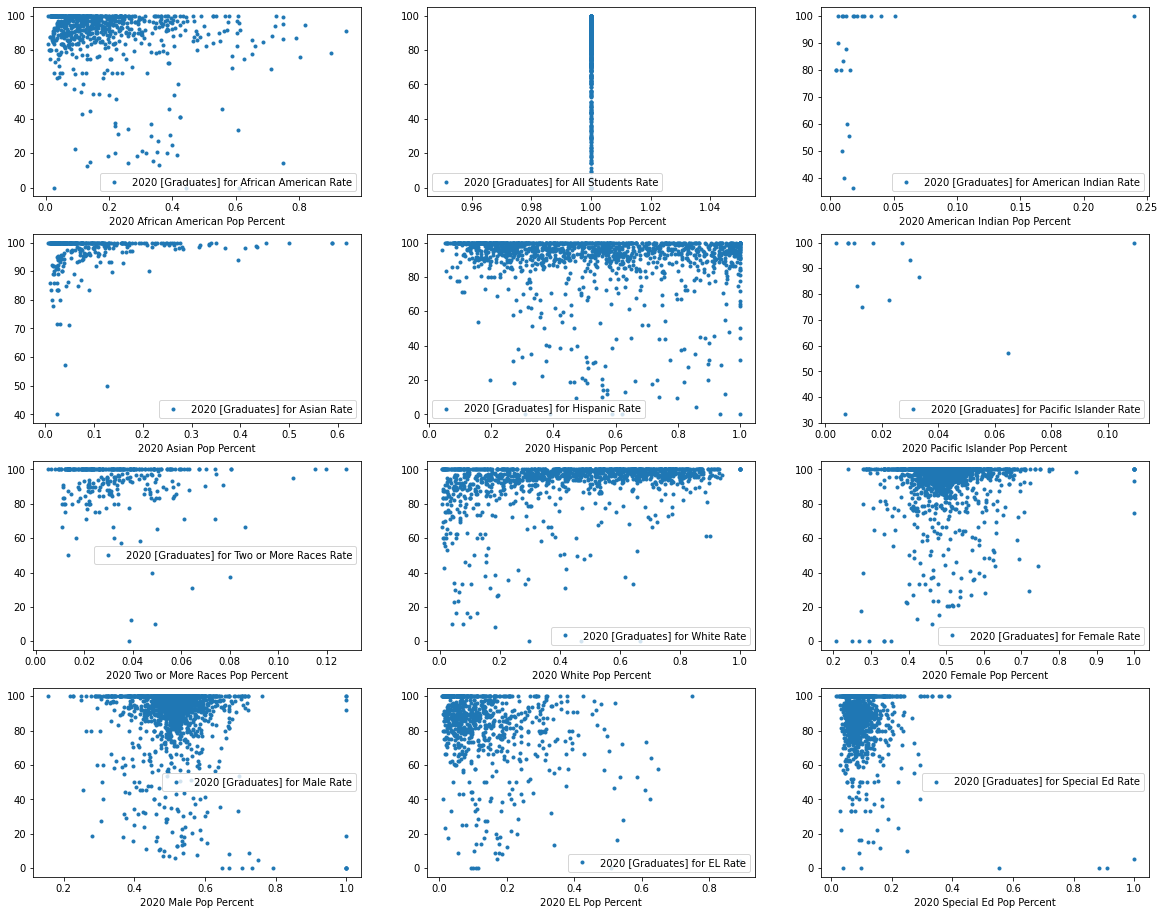

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=3)

fig.set_figheight(16)
fig.set_figwidth(20)

for idx, demo in enumerate(demographics):
    diversity_df.plot(
        x=f'{year} {demo} Pop Percent',
        y=f'{year} [Graduates] for {demo} Rate',
        style='.',
        ax=axes[math.floor(idx / 3), idx % 3]
    )

In [20]:
corr_df = diversity_df.corr(min_periods=3, method='pearson')

for demo in demographics:
    print(
        f'{demo}: ',
        corr_df[f'{year} {demo} Pop Percent'].loc[f'{year} [Graduates] for {demo} Rate'],
        
    )

African American:  -0.20549572437693928
All Students:  nan
American Indian:  0.2248054344459377
Asian:  0.13303778719773124
Hispanic:  -0.14196029279697805
Pacific Islander:  0.019233900625246013
Two or More Races:  -0.07695328780334153
White:  0.2967747428499257
Female:  0.07099417800685882
Male:  -0.11083349263404542
EL:  -0.27358132952567527
Special Ed:  -0.22301793679784535


⚠️ This comparison doesn't control for school spending or economic disadvantage, so it bears some further investigation.

## Correlation between Expenditures, Race, and Graduation Outcomes

Here we take a look at any correlations between expenditures per student and Longitudinal outcomes.

In [21]:
actuals_df = pd.read_csv('./ACTUAL_2020F_SUMMED.csv', index_col='Campus')

In [22]:
spending_df = diversity_df.join(actuals_df)

In [23]:
spending_df['Spending Per Student'] = spending_df['Account Amount'] / spending_df[f'{year} All Students Denominator']

In [24]:
spending_df

,2020 African American Denominator,2020 All Students Denominator,2020 American Indian Denominator,2020 Asian Denominator,2020 Hispanic Denominator,2020 Pacific Islander Denominator,2020 Two or More Races Denominator,2020 White Denominator,2020 Female Denominator,2020 Male Denominator,...,2020 Pacific Islander Pop Percent,2020 Two or More Races Pop Percent,2020 White Pop Percent,2020 Female Pop Percent,2020 Male Pop Percent,2020 EL Pop Percent,2020 Special Ed Pop Percent,Account Amount,Bilingual Spending,Spending Per Student
Campus Number,,,,,,,,,,,,,,,,,,,,,
1902001,NaN,39.0,NaN,NaN,NaN,NaN,NaN,33.0,21.0,18.0,...,NaN,NaN,0.846154,0.538462,0.461538,NaN,0.230769,1757090.0,11055.0,45053.589744
1902041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1116480.0,NaN,NaN
1902103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1677016.0,NaN,NaN
1903001,6.0,89.0,NaN,NaN,10.0,NaN,NaN,67.0,50.0,39.0,...,NaN,NaN,0.752809,0.561798,0.438202,NaN,0.157303,3611305.0,NaN,40576.460674
1903041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2160097.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254901101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2898731.0,3694.0,NaN
254901104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1849253.0,1737.0,NaN
254901106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2871352.0,3642.0,NaN


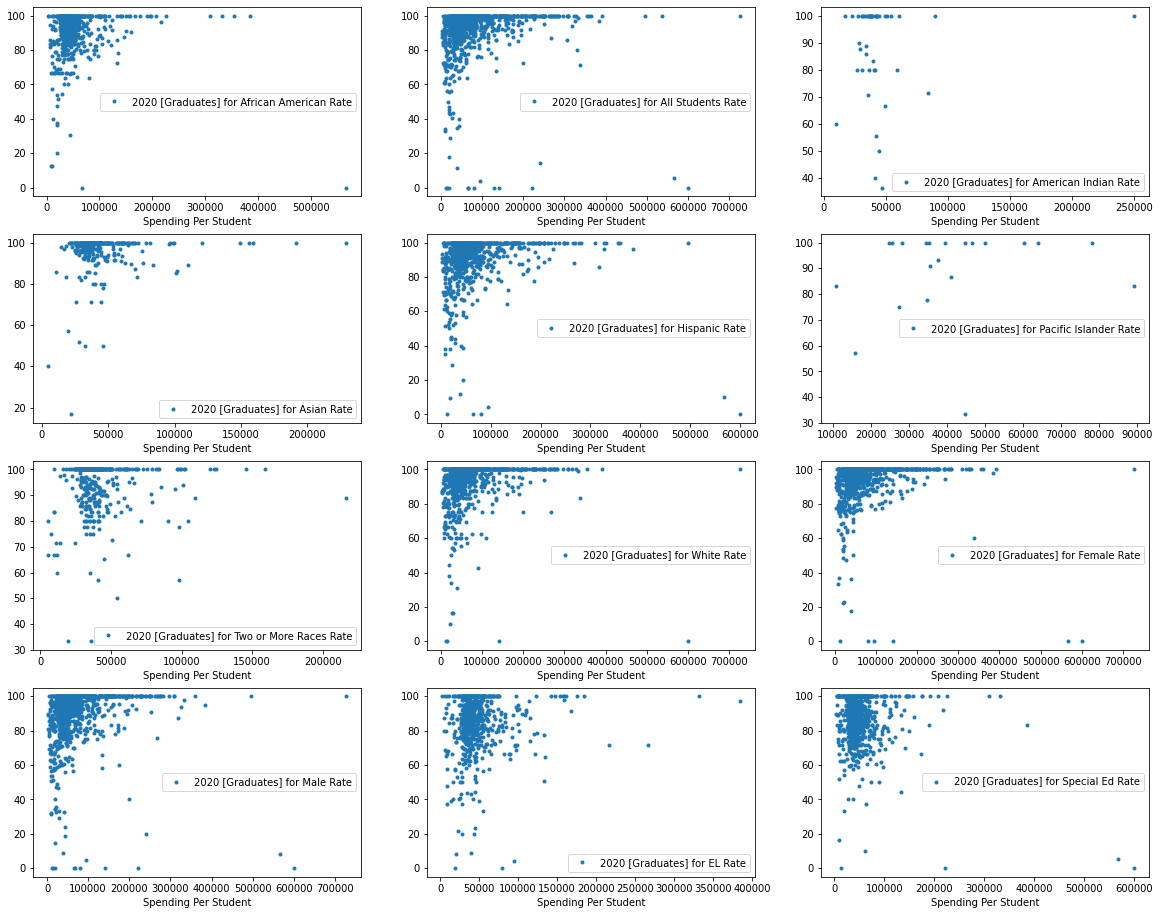

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=3)

fig.set_figheight(16)
fig.set_figwidth(20)

for idx, demo in enumerate(demographics):
    target_col = f'{year} [Graduates] for {demo} Rate'
    spending_df.dropna(subset=['Spending Per Student',target_col]).plot(
        x=f'Spending Per Student',
        y=target_col,
        style='.',
        ax=axes[math.floor(idx / 3), idx % 3]
    )

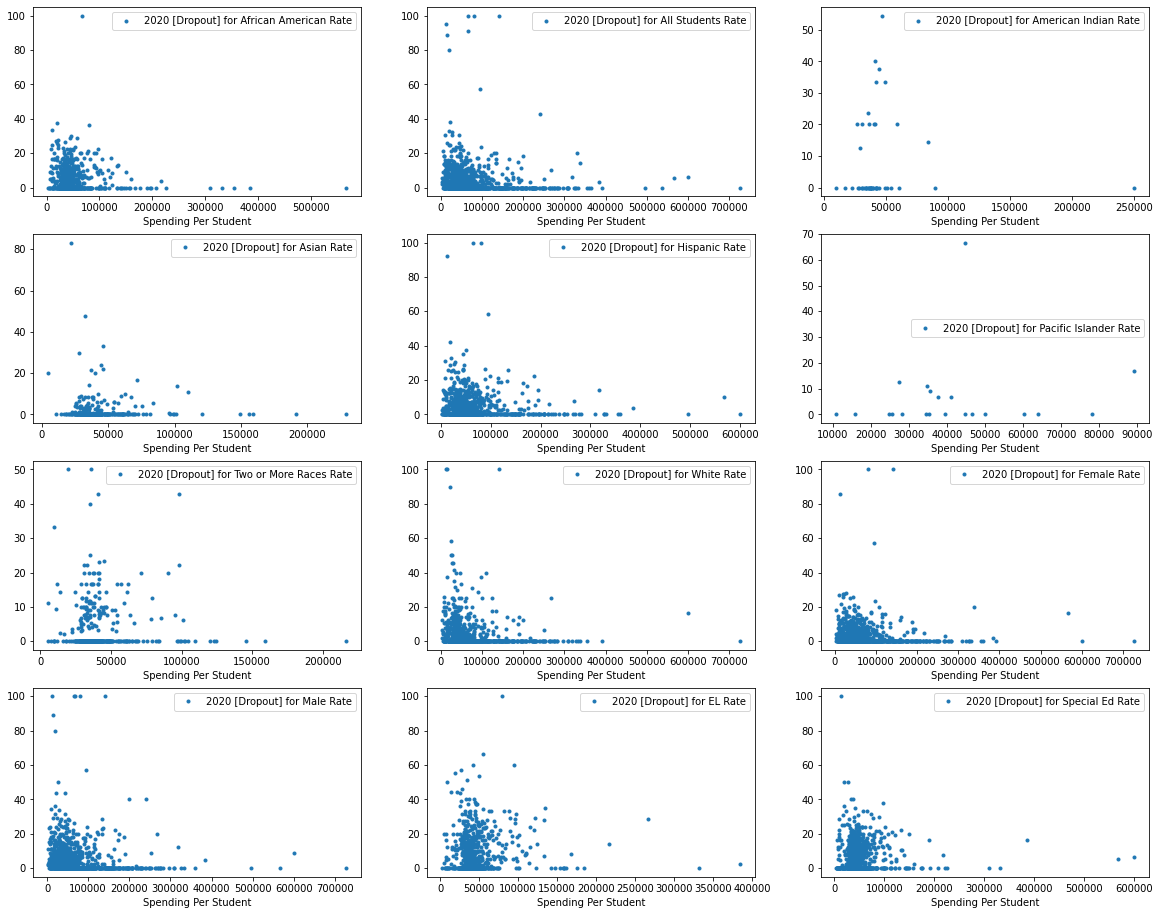

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=3)

fig.set_figheight(16)
fig.set_figwidth(20)

for idx, demo in enumerate(demographics):
    target_col = f'{year} [Dropout] for {demo} Rate'
    spending_df.dropna(subset=['Spending Per Student',target_col]).plot(
        x=f'Spending Per Student',
        y=target_col,
        style='.',
        ax=axes[math.floor(idx / 3), idx % 3]
    )

In [26]:
corr_df = spending_df.corr(method='pearson')
corr_df['Spending Per Student']

2020 African American Denominator             -0.089405
2020 All Students Denominator                 -0.311994
2020 American Indian Denominator               0.015659
2020 Asian Denominator                        -0.165817
2020 Hispanic Denominator                     -0.182672
2020 Pacific Islander Denominator             -0.039014
2020 Two or More Races Denominator            -0.173542
2020 White Denominator                        -0.223045
2020 Female Denominator                       -0.274484
2020 Male Denominator                         -0.276359
2020 EL Denominator                           -0.034287
2020 Special Ed Denominator                   -0.140882
2020 [Graduates] for African American Rate    -0.019957
2020 [Graduates] for All Students Rate         0.026080
2020 [Graduates] for American Indian Rate      0.072952
2020 [Graduates] for Asian Rate                0.069861
2020 [Graduates] for Hispanic Rate             0.013796
2020 [Graduates] for Pacific Islander Rate     0

In [28]:
spending_demo_cols = []

for idx, demo in enumerate(demographics):
    if demo in ['American Indian', 'Pacific Islander']:
        continue
    demo_col = f'Spending per % of population from {demo}'
    spending_df[demo_col] = spending_df['Account Amount'] / spending_df[f'{year} {demo} Pop Percent']
    spending_demo_cols.append(demo_col)

<AxesSubplot:>

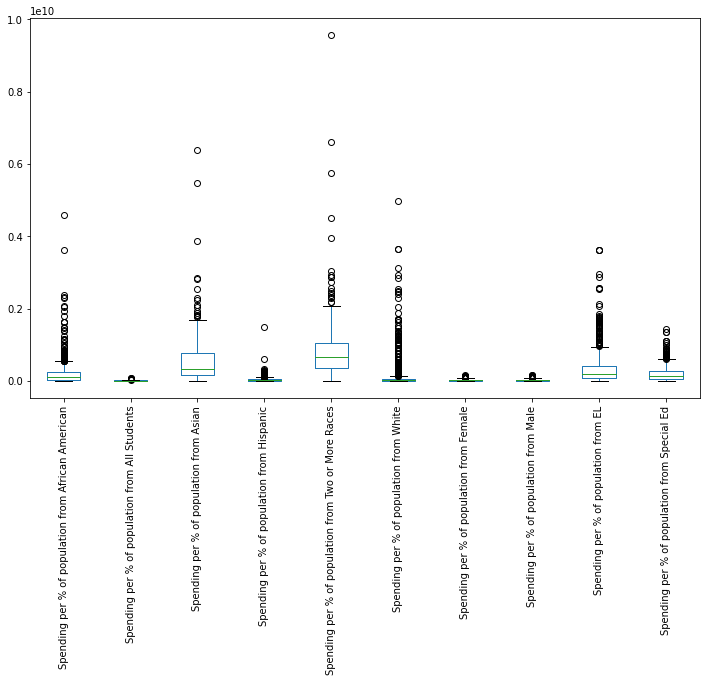

In [32]:
spending_df.boxplot(column=spending_demo_cols, grid=False, rot=90, figsize=(12, 7))

,2020 African American Denominator,2020 All Students Denominator,2020 American Indian Denominator,2020 Asian Denominator,2020 Hispanic Denominator,2020 Pacific Islander Denominator,2020 Two or More Races Denominator,2020 White Denominator,2020 Female Denominator,2020 Male Denominator,...,Spending per % of population from African American,Spending per % of population from All Students,Spending per % of population from Asian,Spending per % of population from Hispanic,Spending per % of population from Two or More Races,Spending per % of population from White,Spending per % of population from Female,Spending per % of population from Male,Spending per % of population from EL,Spending per % of population from Special Ed
Campus Number,,,,,,,,,,,,,,,,,,,,,
14906008,216.0,453.0,5.0,8.0,135.0,15.0,21.0,53.0,223.0,230.0,...,3.912291e+07,18654632.0,1.056319e+09,6.259665e+07,4.024071e+08,1.594443e+08,3.789484e+07,3.674151e+07,2.012035e+08,1.594443e+08
43901001,238.0,1622.0,10.0,270.0,222.0,6.0,82.0,794.0,790.0,832.0,...,3.130085e+08,45928496.0,2.759112e+08,3.355677e+08,9.084881e+08,9.382370e+07,9.429876e+07,8.953849e+07,1.520327e+09,6.056587e+08
50910001,101.0,498.0,5.0,12.0,125.0,15.0,37.0,203.0,236.0,262.0,...,9.277448e+07,18815708.0,7.808519e+08,7.496178e+07,2.532493e+08,4.615873e+07,3.970433e+07,3.576421e+07,7.808519e+08,2.179122e+08
57905025,233.0,1055.0,5.0,NaN,797.0,NaN,NaN,13.0,537.0,518.0,...,1.740941e+08,38449220.0,NaN,5.089577e+07,NaN,3.120302e+09,7.553804e+07,7.830874e+07,2.008115e+08,6.542569e+08
57909002,57.0,555.0,5.0,43.0,356.0,NaN,12.0,82.0,282.0,273.0,...,2.396644e+08,24614185.0,3.176947e+08,3.837324e+07,1.138406e+09,1.665960e+08,4.844281e+07,5.003983e+07,1.241898e+08,3.331920e+08
57912006,28.0,376.0,10.0,31.0,273.0,NaN,NaN,31.0,212.0,164.0,...,1.849200e+08,13770637.0,1.670245e+08,1.896615e+07,NaN,1.670245e+08,2.442339e+07,3.157170e+07,1.015247e+08,3.236100e+08
57914005,225.0,616.0,9.0,17.0,267.0,NaN,13.0,85.0,301.0,315.0,...,7.023067e+07,25652438.0,9.295236e+08,5.918315e+07,1.215531e+09,1.859047e+08,5.249801e+07,5.016477e+07,3.160380e+08,3.435196e+08
91903001,30.0,284.0,6.0,6.0,61.0,NaN,22.0,159.0,133.0,151.0,...,1.059524e+08,11192151.0,5.297618e+08,5.210772e+07,1.444805e+08,1.999101e+07,2.389903e+07,2.105014e+07,4.540816e+08,7.946427e+07
91908001,NaN,126.0,5.0,NaN,12.0,NaN,NaN,101.0,52.0,74.0,...,NaN,4284383.0,NaN,4.498602e+07,NaN,5.344874e+06,1.038139e+07,7.295031e+06,NaN,6.747903e+07


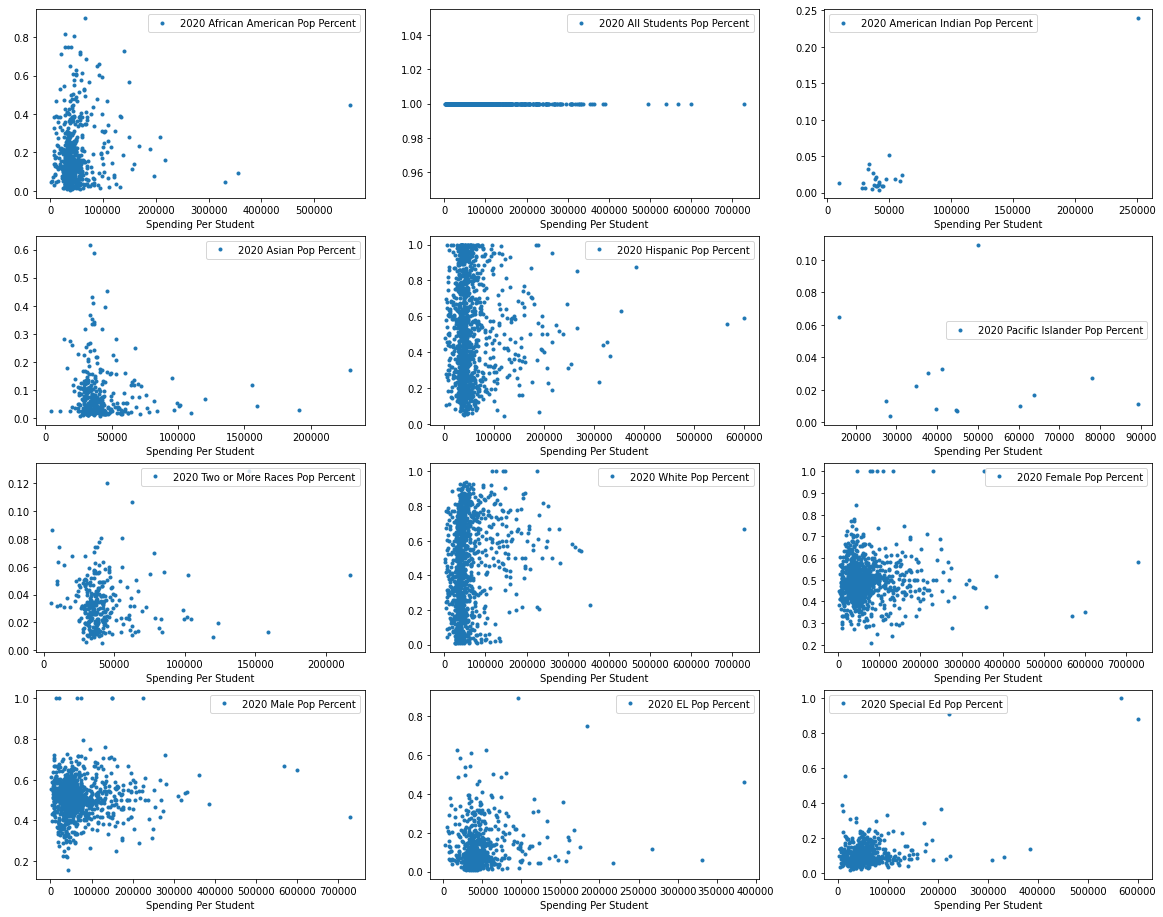

In [35]:
fig, axes = plt.subplots(nrows=4, ncols=3)

fig.set_figheight(16)
fig.set_figwidth(20)

for idx, demo in enumerate(demographics):
    x_col = f'Spending Per Student'
    y_col = f'{year} {demo} Pop Percent'
    spending_df.dropna(subset=[x_col,y_col]).plot(
        x=x_col,
        y=y_col,
        style='.',
        ax=axes[math.floor(idx / 3), idx % 3]
    )
    
spending_df[spending_df[f'{year} American Indian Pop Percent'].notna()]

## Correlation of EL Students and Bilingual Spending

In an equitable learning environment, we should expect schools with English Learning students have proportional spending for bilingual programs. We should expect EL Pop Percent to strongly correlate with bilingual spending.

In [55]:
spending_df['Bilingual Spending Per EL Student'] = spending_df['Bilingual Spending'] / spending_df[f'{year} EL Denominator']

In [56]:
spending_df[spending_df['Bilingual Spending Per EL Student'].notna()]

,2020 African American Denominator,2020 All Students Denominator,2020 American Indian Denominator,2020 Asian Denominator,2020 Hispanic Denominator,2020 Pacific Islander Denominator,2020 Two or More Races Denominator,2020 White Denominator,2020 Female Denominator,2020 Male Denominator,...,2020 Pacific Islander Pop Percent,2020 Two or More Races Pop Percent,2020 White Pop Percent,2020 Female Pop Percent,2020 Male Pop Percent,2020 EL Pop Percent,2020 Special Ed Pop Percent,Account Amount,Bilingual Spending,Bilingual Spending Per EL Student
Campus Number,,,,,,,,,,,,,,,,,,,,,
1907001,57.0,229.0,NaN,NaN,102.0,NaN,NaN,62.0,117.0,112.0,...,NaN,NaN,0.270742,0.510917,0.489083,0.034934,0.096070,10837020.0,61054.0,7631.750000
2901001,NaN,221.0,NaN,NaN,154.0,NaN,NaN,61.0,107.0,114.0,...,NaN,NaN,0.276018,0.484163,0.515837,0.063348,0.067873,13694951.0,1091.0,77.928571
3903001,136.0,481.0,NaN,NaN,208.0,NaN,7.0,122.0,236.0,245.0,...,NaN,0.014553,0.253638,0.490644,0.509356,0.076923,0.103950,29370694.0,115021.0,3108.675676
3905001,NaN,128.0,NaN,NaN,77.0,NaN,NaN,33.0,59.0,69.0,...,NaN,NaN,0.257812,0.460938,0.539062,0.039062,0.093750,4520849.0,20345.0,4069.000000
7904001,NaN,105.0,NaN,NaN,87.0,NaN,NaN,NaN,45.0,60.0,...,NaN,NaN,NaN,0.428571,0.571429,0.104762,0.057143,5189205.0,21171.0,1924.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248901001,NaN,75.0,NaN,NaN,63.0,NaN,NaN,8.0,41.0,34.0,...,NaN,NaN,0.106667,0.546667,0.453333,0.200000,0.106667,3814744.0,21042.0,1402.800000
249903001,NaN,153.0,NaN,NaN,80.0,NaN,NaN,68.0,71.0,82.0,...,NaN,NaN,0.444444,0.464052,0.535948,0.052288,0.078431,5070453.0,37347.0,4668.375000
251901001,NaN,108.0,NaN,NaN,84.0,NaN,NaN,24.0,53.0,55.0,...,NaN,NaN,0.222222,0.490741,0.509259,0.129630,NaN,7957882.0,89287.0,6377.642857


<AxesSubplot:>

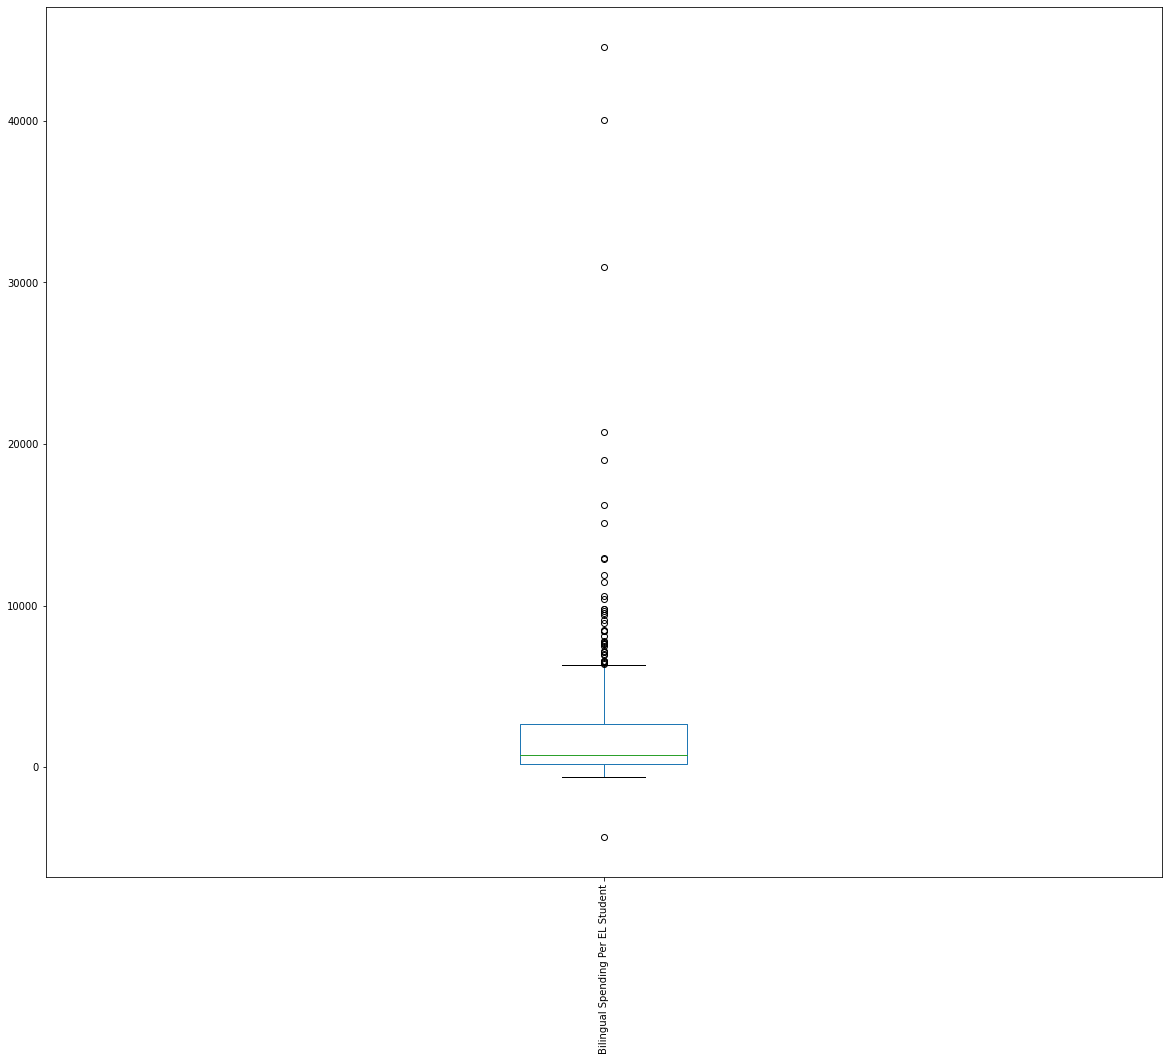

In [47]:
spending_df.boxplot(column=['Bilingual Spending Per EL Student'], grid=False, rot=90, figsize=(20, 16))

<AxesSubplot:xlabel='Bilingual Spending Per EL Student'>

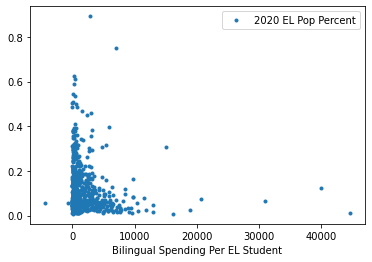

In [31]:
spending_df.dropna(subset=['Bilingual Spending Per EL Student',f'{year} [Graduates] for EL Rate']).plot(
    x=f'Bilingual Spending Per EL Student',
    y=f'{year} EL Pop Percent',
    style='.',
)

<AxesSubplot:xlabel='Bilingual Spending'>

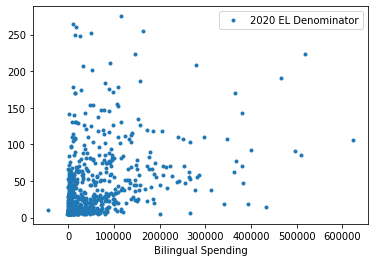

In [32]:
spending_df.plot(
    x='Bilingual Spending',
    y=f'{year} EL Denominator',
    style='.',
)

⚠️ Spending on Bilingual programs is only moderately correlated with the number of english learning students.

In [59]:
spending_df['Percentage Bilingual Spending'] = spending_df['Bilingual Spending'] / spending_df['Account Amount']

<AxesSubplot:xlabel='Percentage Bilingual Spending'>

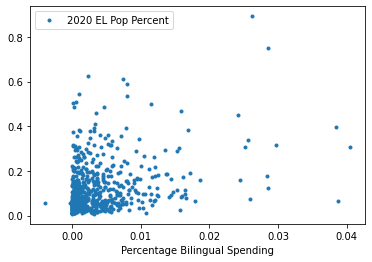

In [60]:
spending_df.plot(
    x='Percentage Bilingual Spending',
    y=f'{year} EL Pop Percent',
    style='.',
)

⚠️ This shows that percentage of the budget spend on bilingual programs does not correlate with the percentage of the population that is English Learning.

In [61]:
corr_df = spending_df.corr(method='pearson')
print(
    corr_df['Bilingual Spending Per EL Student'][f'{year} EL Pop Percent'],
    corr_df['Bilingual Spending Per EL Student'][f'{year} [Dropout] for EL Rate'],
    corr_df['Bilingual Spending'][f'{year} EL Denominator'],
    corr_df['Percentage Bilingual Spending'][f'{year} EL Pop Percent'],
)

-0.13786242628672032 -0.10960945470982103 0.33303360693286993 0.31553242245225654


In [36]:
el_df = spending_df[[
    'Bilingual Spending',
    'Account Amount', 
    '2020 EL Denominator',
    '2020 All Students Denominator',
    'Percentage Bilingual Spending',
    '2020 EL Pop Percent'
]]
el_df

,Bilingual Spending,Account Amount,2020 EL Denominator,2020 All Students Denominator,Percentage Bilingual Spending,2020 EL Pop Percent
Campus Number,,,,,,
1902001,11055.0,1757090.0,NaN,39.0,0.006292,NaN
1902041,NaN,1116480.0,NaN,NaN,NaN,NaN
1902103,NaN,1677016.0,NaN,NaN,NaN,NaN
1903001,NaN,3611305.0,NaN,89.0,NaN,NaN
1903041,NaN,2160097.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
254901101,3694.0,2898731.0,NaN,NaN,0.001274,NaN
254901104,1737.0,1849253.0,NaN,NaN,0.000939,NaN
254901106,3642.0,2871352.0,NaN,NaN,0.001268,NaN


In [37]:
el_df.to_csv('./school-spending-el.csv')

But, does funding correlate with outcomes?

<AxesSubplot:xlabel='Bilingual Spending Per EL Student'>

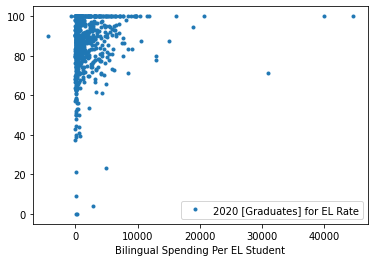

In [42]:
spending_df.plot(
    x='Bilingual Spending Per EL Student',
    y=f'{year} [Graduates] for EL Rate',
    style='.',
)

In [43]:
corr_df['Bilingual Spending Per EL Student'][f'{year} [Graduates] for EL Rate']

0.14681227162002344

<AxesSubplot:xlabel='Bilingual Spending Per EL Student'>

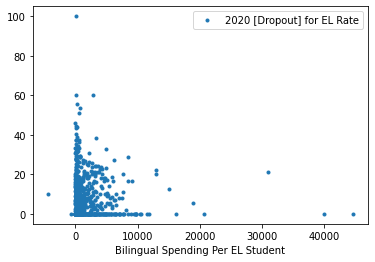

In [57]:
spending_df.plot(
    x='Bilingual Spending Per EL Student',
    y=f'{year} [Dropout] for EL Rate',
    style='.',
)